In [77]:
import os
import pydicom
import matplotlib.pyplot as plt
from itertools import islice
import pandas as pd

## Sprawdzenie plików csv z opisami zbiorów danych

### Train set

In [87]:
description_train_csv = pd.read_csv("/home/kasia/Pulpit/MGR/obrazy/mass_case_description_train_set.csv")

In [88]:
len(description_train_csv)

1318

In [97]:
image_per_patient_train = description_train_csv.groupby('patient_id').size().rename("Count").reset_index()\
.sort_values(by="Count", ascending=False)

In [98]:
len(image_per_patient_train.loc[image_per_patient['Count']>3])

38

### Test set

In [85]:
description_test_csv = pd.read_csv("/home/kasia/Pulpit/MGR/obrazy/mass_case_description_test_set.csv")

In [89]:
len(description_test_csv)

378

In [95]:
image_per_patient_test = description_test_csv.groupby('patient_id').size().rename("Count").reset_index()\
.sort_values(by="Count", ascending=False)

In [96]:
len(image_per_patient_test.loc[image_per_patient['Count']>3])

17

---

## Wczytanie obrazów

In [3]:
# one sample

filename = "/home/kasia/Pulpit/MGR/obrazy/CBIS-DDSM_wybrane/CBIS-DDSM/Mass-Test_P_00016_LEFT_CC/10-04-2016-DDSM-30104/1-full mammogram images-14172/000000.dcm"
ds = pydicom.dcmread(filename)

In [16]:
main_folder_name = '/home/kasia/Pulpit/MGR/obrazy/CBIS-DDSM_wybrane'

dicom_images = {}

for dirname, dirnames, filenames in os.walk(main_folder_name):

    # print path to all filenames.
    for filename in filenames:
        
        file_path = os.path.join(dirname, filename)
        
        image_number = file_path.split()[-1]
        
        dicom_images[image_number[:-11]] = pydicom.dcmread(file_path)

In [20]:
dicom_images['images-74983']

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.2.196727533711244741831152485212683563956
(0008, 0020) Study Date                          DA: '20161004'
(0008, 0023) Content Date                        DA: '20160426'
(0008, 0030) Study Time                          TM: '133640'
(0008, 0033) Content Time                        TM: '150127.279000'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'MG'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'full mammogram images'
(0010, 0010) Patient's Name                      PN: 'Mass-Test_P_01912_RIGHT_MLO'
(0010, 0020) Patient ID                          LO: 'Mass-Test_P_01912_RIGHT_MLO'


images-74983
Mass-Test_P_01912_RIGHT_MLO


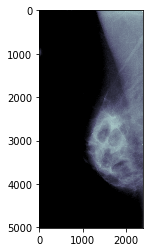

images-78246
Mass-Test_P_00347_LEFT_MLO


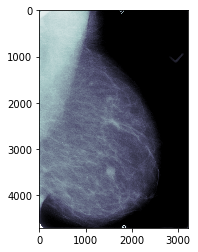

images-09866
Mass-Test_P_01251_LEFT_MLO


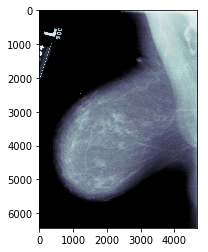

images-91797
Mass-Test_P_00533_LEFT_MLO


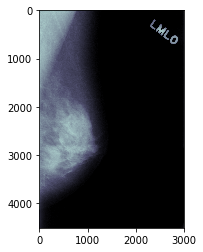

images-05531
Mass-Test_P_01590_LEFT_CC


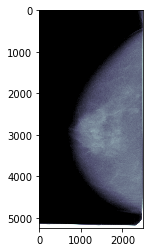

In [45]:
iterator = 0
max_val = 5

for key,value in dicom_images.items():
    
    if iterator<max_val:
        
        print(key)
        print(value.PatientName)
        plt.imshow(value.pixel_array, cmap=plt.cm.bone)
        plt.show()
        iterator+=1

-----

In [61]:
names_list = []

for key,value in dicom_images.items():
        
        names_list.append(str(value.PatientName))

In [69]:
names_list[3][12:17]

'00533'

In [64]:
sorted(names_list)

['Mass-Test_P_00016_LEFT_CC',
 'Mass-Test_P_00016_LEFT_MLO',
 'Mass-Test_P_00017_LEFT_CC',
 'Mass-Test_P_00017_LEFT_MLO',
 'Mass-Test_P_00032_RIGHT_CC',
 'Mass-Test_P_00032_RIGHT_MLO',
 'Mass-Test_P_00037_RIGHT_CC',
 'Mass-Test_P_00037_RIGHT_MLO',
 'Mass-Test_P_00056_LEFT_MLO',
 'Mass-Test_P_00066_LEFT_CC',
 'Mass-Test_P_00066_LEFT_MLO',
 'Mass-Test_P_00099_LEFT_MLO',
 'Mass-Test_P_00114_LEFT_MLO',
 'Mass-Test_P_00116_RIGHT_CC',
 'Mass-Test_P_00116_RIGHT_MLO',
 'Mass-Test_P_00118_RIGHT_CC',
 'Mass-Test_P_00118_RIGHT_MLO',
 'Mass-Test_P_00124_RIGHT_CC',
 'Mass-Test_P_00126_RIGHT_CC',
 'Mass-Test_P_00126_RIGHT_MLO',
 'Mass-Test_P_00131_LEFT_CC',
 'Mass-Test_P_00131_LEFT_MLO',
 'Mass-Test_P_00145_LEFT_CC',
 'Mass-Test_P_00147_RIGHT_CC',
 'Mass-Test_P_00147_RIGHT_MLO',
 'Mass-Test_P_00156_RIGHT_MLO',
 'Mass-Test_P_00158_RIGHT_MLO',
 'Mass-Test_P_00159_RIGHT_MLO',
 'Mass-Test_P_00171_RIGHT_CC',
 'Mass-Test_P_00171_RIGHT_MLO',
 'Mass-Test_P_00173_LEFT_CC',
 'Mass-Test_P_00173_LEFT_MLO',
 'Ma

In [65]:
len(names_list)

359

In [66]:
len(dicom_images)

359

In [75]:
same_patients_list = []

for name_1 in names_list:
    
    selected_number = name_1[12:17]
    iterator = 0
    
    for name_2 in names_list:
        if selected_number in name_2:
            iterator += 1
    
    if iterator > 3:
        same_patients_list.append(selected_number)
        print(selected_number)
    

00200
00343
00173
00391
00820
00391
00343
00200
00343
00200
00173
00820
00173
00820
00200
00173
00391
00343
00391
00820


In [76]:
len(same_patients_list)

20

------------------